In [10]:
import pandas as pd
import os

def troubleshoot_csv_reading(file_path):
    # Check if file exists
    if not os.path.exists(file_path):
        print(f"Error: File '{file_path}' does not exist.")
        print(f"Current working directory: {os.getcwd()}")
        print("Files in current directory:")
        print(os.listdir())
        return None
    
    # Check if file is readable
    if not os.access(file_path, os.R_OK):
        print(f"Error: No permission to read '{file_path}'.")
        return None
    
    # Try reading with different encodings
    encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
    
    for encoding in encodings:
        try:
            # Try with default comma delimiter
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"Success! File read with encoding: {encoding}")
            print(f"DataFrame shape: {df.shape}")
            return df
        except UnicodeDecodeError:
            continue
        except pd.errors.EmptyDataError:
            print("Error: The file is empty.")
            return None
        except Exception as e:
            pass
    
    # Try with different delimiters
    delimiters = [',', ';', '\t', '|']
    for delimiter in delimiters:
        try:
            df = pd.read_csv(file_path, delimiter=delimiter, encoding='utf-8')
            print(f"Success! File read with delimiter: '{delimiter}'")
            print(f"DataFrame shape: {df.shape}")
            return df
        except Exception as e:
            pass
    
    print("All attempts to read the CSV file failed.")
    print("Try opening the file in a text editor to check its format.")
    return None

# Example usage:
# Replace 'your_file.csv' with your actual file path
df = troubleshoot_csv_reading('titanic.csv')

# If successful, show the first few rows
if df is not None:
    print("\nPreview of the data:")
    print(df.head())

Success! File read with encoding: utf-8
DataFrame shape: (891, 12)

Preview of the data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0           

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
print(df.info())
print(df.describe())
print(df.isnull())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [16]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [35]:
# Fill missing values in Age column with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Make sure you're using the correct column name - using 'Embarked' instead of 'Embarked_S'
df['Embarked_S'] = df['Embarked_S'].fillna(df['Embarked_S'].mode()[0])

# Add these lines to display the results
print("Number of missing values in Age column:", df['Age'].isna().sum())
print("Number of missing values in Embarked_S column:", df['Embarked_S'].isna().sum())

# Display the first few rows of the dataframe to see the changes
df.head()


Number of missing values in Age column: 0
Number of missing values in Embarked_S column: 0


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [20]:
# Check if the columns have already been converted to dummies
if 'Sex' in df.columns and 'Embarked' in df.columns:
    # If original columns still exist, convert them to dummies
    df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
else:
    # If columns have already been converted, print a message
    print("Columns 'Sex' and 'Embarked' have already been converted to dummy variables.")
    print("Current dummy columns:", [col for col in df.columns if col.startswith(('Sex_', 'Embarked_'))])

# Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True


In [14]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Check if df is defined, if not, load it
try:
    # This will raise a NameError if df doesn't exist
    df.head(1)
except NameError:
    print("Loading dataframe...")
    # Load your dataframe - adjust the path as needed
    df = pd.read_csv("titanic.csv")  # Replace with your actual file path

# Display before scaling
print("Before scaling:")
print(df[['Age', 'Fare']].describe().round(2))

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data and transform it
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# Display after scaling to show the output
print("\nAfter scaling:")
print(df[['Age', 'Fare']].describe().round(2))

# Show the first few rows to confirm the transformation
print("\nFirst 5 rows after scaling:")
print(df[['Age', 'Fare']].head())

Before scaling:
          Age    Fare
count  714.00  891.00
mean    29.70   32.20
std     14.53   49.69
min      0.42    0.00
25%     20.12    7.91
50%     28.00   14.45
75%     38.00   31.00
max     80.00  512.33

After scaling:
          Age    Fare
count  714.00  891.00
mean     0.00    0.00
std      1.00    1.00
min     -2.02   -0.65
25%     -0.66   -0.49
50%     -0.12   -0.36
75%      0.57   -0.02
max      3.47    9.67

First 5 rows after scaling:
        Age      Fare
0 -0.530377 -0.502445
1  0.571831  0.786845
2 -0.254825 -0.488854
3  0.365167  0.420730
4  0.365167 -0.486337


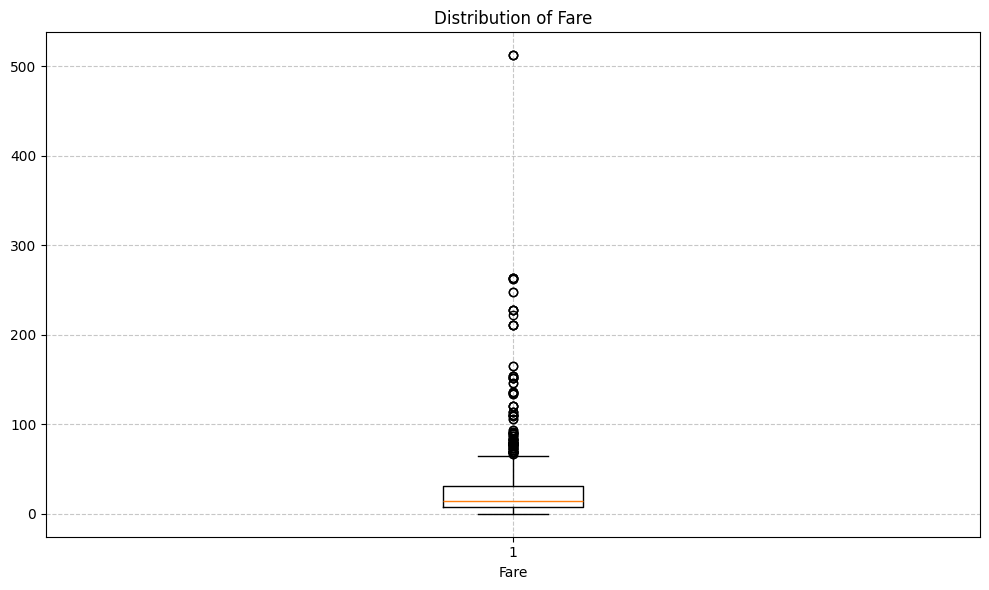

Fare Statistics:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataframe - adjust the path as needed
# If you already have the dataframe loaded elsewhere, you can skip this step
df = pd.read_csv("titanic.csv")  # Replace with your actual file path

# Create a boxplot for the Fare column using matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(df['Fare'].dropna())
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display some statistics about the Fare column
print("Fare Statistics:")
print(df['Fare'].describe())